In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import main_functions as mf
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import plotly.express as px
import plotly.graph_objects as go

In [9]:
dyns.u_.shape

(1000, 5)

In [19]:
dyns = mf.create_slds(K=3, D_obs=4, D_control=2)

data = dyns.generate(T=1000)
dynamics = np.vstack([data[:, k, 0].flatten() for k in range(4)])

In [20]:
fig = px.line(dynamics.T)
fig.add_traces(go.Scatter(y = dyns.z_*max(dynamics[0]), mode='lines', marker=dict(color='#000', size=8), name='subsystem'))
fig.show()

In [69]:
T=1000
u = sparse.rand(T, 2, density=0.01,
                format="csr")  # Control input

# Define switching intervals and mechanism
switch_interval = np.random.randint(5, 100, size=T//10)
switch = np.zeros(T, dtype=int)

# Determine switch points
current_state = 0
switch[0:switch_interval[0]] = current_state  # initial state
for i in range(1, T//10):
    start = np.sum(switch_interval[:i])
    end = start + switch_interval[i]
    current_state = (current_state + 1) % 2
    switch[start:end] = current_state


In [75]:
switch

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [78]:
u

<1000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [80]:
switch_t = np.zeros((T, 2))
switch_t[np.arange(T), switch] = 1
u_t = sparse.hstack((u, switch_t))
u_t.A

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [63]:
switch_interval = np.random.randint(5, 100, size=1000//10)
switch_interval

array([144, 179,  85, 137, 153, 139, 150,  79,  36, 169, 198, 130, 151,
        44,  96,  77, 110, 166,  51,  71,  40, 153,  53,  49,  29, 133,
       188, 139,   8, 183,  97, 112,  20, 143,  98, 186, 171,  52, 170,
       147,  75, 103,   7, 168, 158,  38,  90, 155,  30,  44,  20,  96,
       134,  99, 154,  99, 142,   5,  54,  66, 154,  52,  32, 191, 166,
        55,  15, 126,  16, 174, 148,  42,  97,  94,  33,  59,  28, 114,
        57,  57,  97, 115, 131, 138,  95,  15, 193,  43,  73,  50, 153,
        43,  77, 171,  37, 170, 111, 132,  28, 179])

In [82]:
slds_dynamics_sparse = mf.create_dynamics('SLDS',1000,0.01)

TypeError: 'coo_matrix' object is not subscriptable

In [47]:
#dynamics = slds_dynamics[:3,:]
switch = slds_dynamics_sparse[4:,:]

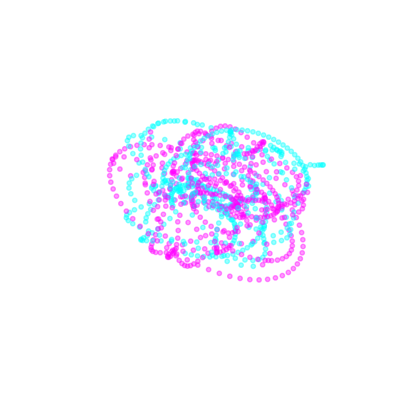

In [87]:
mf.visualize_dyn(slds_dynamics_sparse[:3,:], color_sig=switch) # with U sampling from a sine function

In [88]:
import plotly.express as px
px.line(slds_dynamics_sparse.T)

In [12]:
px.line(slds_dynamics_sparse.T)

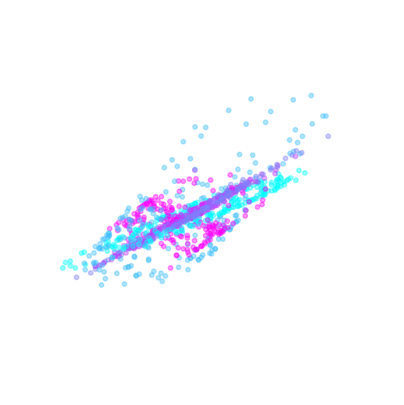

In [7]:
mf.visualize_dyn(dynamics, color_sig=switch) # with U sampling from a sine function

In [9]:
lorenz_dynamics = mf.create_dynamics('lorenz',1000,0.01,with_control=True)

In [10]:
lorenz_dynamics.shape

(3, 99999)

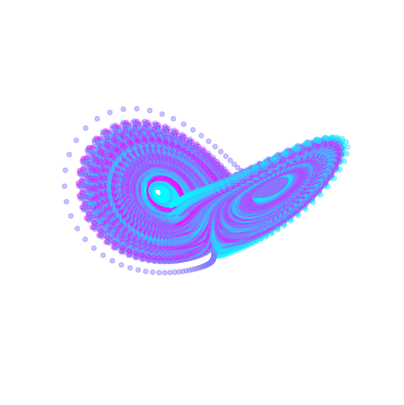

In [11]:
mf.visualize_dyn(lorenz_dynamics)

In [12]:
lorenz_model = mf.train_model_include_D(data=lorenz_dynamics, max_iter=20)

c:\Users\LAK\miniforge\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\LAK\miniforge\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error = 414.91314102956716
Error = 32293859882653.08
Error = 4.228682569525637e+24
Error = 457.20617962040444
Error = 442.6717342288962
Error = 442.7094930383299
Error = 442.7094889117592
Error = 442.70948891231
Error = 442.70948891231006
mixed F
Error = 442.70948891230984
Error = 2107249.529024684
Error = 4.070412785081933e+19
Error = 4.063454846898069e+31
Error = 586.951621533088
Error = 442.19607880674386
Error = 442.70978321301766
Error = 442.7094887141489
Error = 442.709488912468
Error = 442.7094889123097
Arrived to max iter
[414.91314102956716, 32293859882653.08, 4.228682569525637e+24, 457.20617962040444, 442.6717342288962, 442.7094930383299, 442.7094889117592, 442.70948891231, 442.70948891231006, 442.70948891230984, 2107249.529024684, 4.070412785081933e+19, 4.063454846898069e+31, 586.951621533088, 442.19607880674386, 442.70978321301766, 442.7094887141489, 442.709488912468, 442.7094889123097]


In [13]:
lorenz_recon = mf.create_reco(lorenz_dynamics, lorenz_model[0], lorenz_model[1])

In [14]:
lorenz_dynamics

array([[ 0.        ,  0.09439364,  0.18080283, ...,  1.86525594,
         1.88386059,  1.9155577 ],
       [ 1.        ,  0.98783102,  1.0100399 , ...,  2.4322075 ,
         2.58815836,  2.75352862],
       [ 1.05      ,  1.02283842,  0.99748006, ..., 15.47970467,
        15.03216136, 14.60012622]])

In [15]:
lorenz_recon

array([[0.        , 0.7016877 , 0.72944093, ..., 6.59238937, 6.50139344,
        6.42307084],
       [1.        , 0.7016877 , 0.72944093, ..., 6.59238937, 6.50139344,
        6.42307084],
       [1.05      , 0.7016877 , 0.72944093, ..., 6.59238937, 6.50139344,
        6.42307084]])

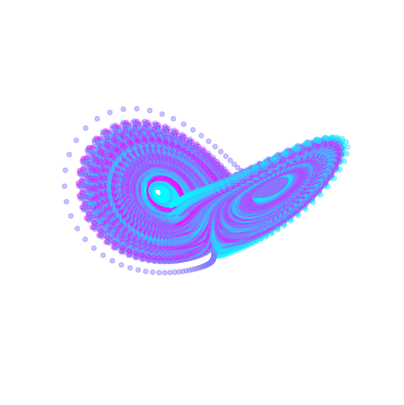

In [16]:
mf.visualize_dyn(lorenz_dynamics)

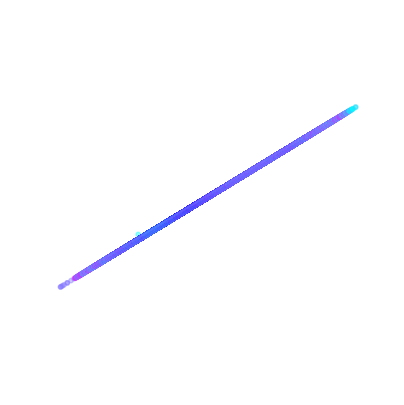

In [17]:
mf.visualize_dyn(lorenz_recon)

In [18]:
lorenz_model_1000 = mf.train_model_include_D(data=lorenz_dynamics, max_iter=1000)

Error = 414.91314102956716
Error = 32293859882653.08
Error = 4.228682569525637e+24
Error = 457.20617962040444
Error = 442.6717342288962
Error = 442.7094930383299
Error = 442.7094889117592
Error = 442.70948891231
Error = 442.70948891231006
mixed F
Error = 442.70948891230984
Error = 2107249.529024684
Error = 4.070412785081933e+19
Error = 4.063454846898069e+31
Error = 586.951621533088
Error = 442.19607880674386
Error = 442.70978321301766
Error = 442.7094887141489
Error = 442.709488912468
Error = 442.7094889123097
Error = 442.70948891231006
mixed F
Error = 442.70948891230984
Error = 182307254516233.38
Error = 4.5522396679783637e+21
Error = 4.126831587825998e+28
Error = 288.4947060097269
Error = 457.63868426578625
Error = 442.4188186377634
Error = 442.71064614283813
Error = 442.70948338870585
Error = 442.7094889434501
Error = 442.70948891210315
Error = 442.7094889123116
mixed F
Error = 442.70948891230984
Error = 4997.594790879776
Error = 108210119246813.33
Error = 5.0697551364746e+22
Error 

In [22]:
lorenz_recon_1000 = mf.create_reco(lorenz_dynamics, lorenz_model_1000[0], lorenz_model_1000[1])

In [23]:
lorenz_recon_1000

array([[ 0.        ,  0.09439364,  0.18080283, ...,  1.86525594,
         1.88386059,  1.9155577 ],
       [ 1.        ,  0.98783102,  1.0100399 , ...,  2.4322075 ,
         2.58815836,  2.75352862],
       [ 1.05      ,  1.02283842,  0.99748006, ..., 15.47970467,
        15.03216136, 14.60012622]])

In [21]:
lorenz_dynamics

array([[ 0.        ,  0.09439364,  0.18080283, ...,  1.86525594,
         1.88386059,  1.9155577 ],
       [ 1.        ,  0.98783102,  1.0100399 , ...,  2.4322075 ,
         2.58815836,  2.75352862],
       [ 1.05      ,  1.02283842,  0.99748006, ..., 15.47970467,
        15.03216136, 14.60012622]])

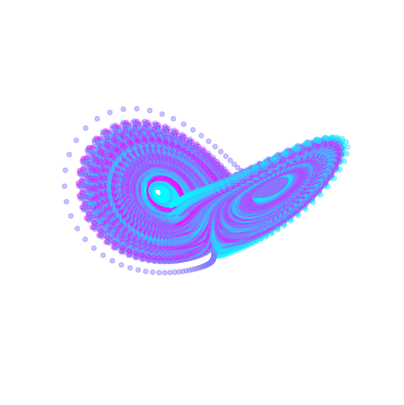

In [24]:
mf.visualize_dyn(lorenz_recon_1000)

In [3]:
import pandas as pd
from sklearn.decomposition import PCA

celegans_raw = pd.read_hdf('quartiled_data_0602.h5')

In [4]:
pca = PCA(n_components=3)
celegans_pca = pd.DataFrame(pca.fit_transform(celegans_raw.iloc[:, :-2]))
celegans_pca_dynamics = celegans_pca.T.to_numpy()

In [99]:
(celegans_raw.iloc[:, :-2]-pca.mean_) @ pca.components_.T

,0,1,2
0,6.574666,1.573097,0.126666
1,5.875678,0.411163,0.027286
2,6.041945,1.354685,0.450116
3,6.001913,0.444860,0.701331
4,5.786398,0.049870,0.319848
...,...,...,...
76562,-6.698435,0.290803,1.335496
76563,-6.811503,0.473290,0.937516
76564,-6.903042,0.140820,1.373337
76565,-6.958533,0.420026,1.221944


In [101]:
pca.components_.T.shape

(74, 3)

In [103]:
celegans_raw_dynamics.T.shape

(76567, 74)

In [21]:
celegans_raw_dynamics = celegans_raw.iloc[:, :-2].T.to_numpy()

In [118]:
import importlib
importlib.reload(mf)

<module 'main_functions' from 'c:\\Users\\LAK\\dLDS-Discrete-Python-Model\\dLDS_discrete\\dlds_discrete\\main_functions.py'>

In [119]:
celegans_raw_model_1000 = mf.train_model_include_D(data=celegans_raw_dynamics, include_D=True, D=pca.components_.T, latent_dim=3,max_iter=1000)

Error = 69.88287795301713
Error reco y = 0.47481695493367204
Error = 629364462640.2764
Error reco y = 0.47481695493367204
Error = 4.4666735740874177e+21
Error reco y = 0.47481695493367204
Error = 3.198104791122751e+30
Error reco y = 0.47481695493367204
Error = 49.02426646843024
Error reco y = 0.47481695493367204
Error = 49.06482234055601
Error reco y = 0.47481695493367204
Error = 49.06476357685638
Error reco y = 0.47481695493367204
Error = 49.06476367673019
Error reco y = 0.47481695493367204
Error = 49.06476367653039
Error reco y = 0.47481695493367204
Error = 49.06476367653089
Error reco y = 0.47481695493367204
mixed F
Error = 49.06476367653086
Error reco y = 0.47481695493367204
Error = 3332209.599908612
Error reco y = 0.47481695493367204
Error = 8.695508680430926e+16
Error reco y = 0.47481695493367204
Error = 5.086826327760061e+25
Error reco y = 0.47481695493367204
Error = 65.64959841983163
Error reco y = 0.47481695493367204
Error = 49.00414866274471
Error reco y = 0.47481695493367204

In [122]:
mf.visualize_dyn(celegans_raw_model_20)

AttributeError: 'tuple' object has no attribute 'shape'

In [79]:
celegans_raw_model_20 = mf.train_model_include_D(data=celegans_raw_dynamics, max_iter=20)

c:\Users\LAK\miniforge\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\LAK\miniforge\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error = 4.796310808468811
Error = 147441.5677799165
Error = 3.5796918285587077e+18
Error = 3.0107432857186054
Error = 256145419884671.1
Error = 69454.64768662046
Error = 3.0066906715334327
Error = 3.0066201411617826
Error = 3.0066188835904066
Error = 3.006619213111369
Error = 3.0066185964517462
mixed F
Error = 3.0066188835904057
Error = 2.1700586543633356
Error = 362584.12371564
Error = 8.631197752455695e+17
Error = 3.0066369823069734
Error = 7670184603488351.0
Error = 669068651.0402731
Error = 4.183706142018251
Arrived to max iter
[4.796310808468811, 147441.5677799165, 3.5796918285587077e+18, 3.0107432857186054, 256145419884671.1, 69454.64768662046, 3.0066906715334327, 3.0066201411617826, 3.0066188835904066, 3.006619213111369, 3.0066185964517462, 3.0066188835904057, 2.1700586543633356, 362584.12371564, 8.631197752455695e+17, 3.0066369823069734, 7670184603488351.0, 669068651.0402731, 4.183706142018251]


In [113]:
celegans_raw_model_20[1]

[array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[-0.33333333, -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333]]),
 array([[-0.33333333, -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333]])]

In [123]:
celegans_raw_recon_1000 = mf.create_reco(celegans_pca_dynamics, celegans_raw_model_1000[0], celegans_raw_model_1000[1])

In [115]:
celegans_raw_recon_20 = mf.create_reco(celegans_pca_dynamics, celegans_raw_model_20[0], celegans_raw_model_20[1])

(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 3)
(3,)
(3, 

In [117]:
celegans_pca_dynamics

array([[ 6.57466614,  5.87567776,  6.04194468, ..., -6.90304241,
        -6.95853301, -6.66577644],
       [ 1.57309762,  0.4111635 ,  1.35468538, ...,  0.14082014,
         0.42002591,  0.27060153],
       [ 0.12666702,  0.02728783,  0.45011698, ...,  1.37333382,
         1.22194027,  0.61224484]])

In [116]:
celegans_raw_recon_20

array([[ 6.57466614,  2.41297661,  2.3400951 , ..., -1.81092156,
        -1.86122057, -1.37355434],
       [ 1.57309762,  2.41297661,  2.3400951 , ..., -1.81092156,
        -1.86122057, -1.37355434],
       [ 0.12666702,  2.41297661,  2.3400951 , ..., -1.81092156,
        -1.86122057, -1.37355434]])

In [124]:
celegans_raw_recon_1000

array([[ 6.57466614,  6.25619594,  5.52379418, ..., -8.085369  ,
        -7.88438956, -7.17409949],
       [ 1.57309762, -1.01434446,  1.1249278 , ..., -0.40024321,
         0.90120472,  0.33033221],
       [ 0.12666702, -0.24190541,  0.03602052, ..., -1.75164341,
        -5.35958136,  0.66168273]])

In [86]:
celegans_raw_dynamics

array([[ 1.45356924,  1.59734755,  0.94089352, ...,  0.29204549,
         0.38388345,  0.47184872],
       [ 1.89415223,  1.55691925,  0.69050439, ...,  0.38618357,
         0.2941395 ,  0.71758993],
       [ 0.02801274, -0.25272708, -0.6787359 , ..., -0.4275315 ,
        -0.20853952, -0.23664238],
       ...,
       [ 1.10870689,  1.01570298,  1.01758517, ..., -0.17133852,
        -0.12612545, -0.19594657],
       [-0.11336269, -0.17799766,  0.03541225, ...,  1.95912628,
         2.0099714 ,  1.98727327],
       [-0.4533416 , -0.43500579, -0.1355468 , ...,  2.18407251,
         2.20009107,  2.22893648]])

In [91]:
celegans_pca_model_1000 = mf.train_model_include_D(data=celegans_pca_dynamics, max_iter=1000)

c:\Users\LAK\miniforge\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\LAK\miniforge\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error = 196.75913688434184
Error = 183416094659.9545
Error = 1.6993752368576728e+20
Error = 3.737543467547919e+30
Error = 20.23847880816104
Error = 20.33724638934486
Error = 20.337014499717746
Error = 20.33701511672093
Error = 20.337015114790365
Error = 20.337015114797463
mixed F
Error = 20.337015114797428
Error = 8089936.580356726
Error = 94890360662172.61
Error = 2.4394218306771247e+26
Error = 45.159382138241085
Error = 19.408790085097333
Error = 20.35295263616801
Error = 20.336756062492114
Error = 20.337020058592188
Error = 20.3370150036503
Error = 20.337015117751218
Error = 20.337015114704577
mixed F
Error = 20.337015114800884
Error = 528430135.3034524
Error = 1569971008149.9707
Error = 1.0559191472647075e+18
Error = 6.20267434475277e+29
Error = 7.139024739005143
Error = 6.868040571374797
Error = 6.816938115920584
Error = 6.798412181686266
Error = 6.790196315999675
Error = 6.785855973825769
Error = 6.783309629749598
Error = 6.781823266086769
Error = 6.780901110101217
Error = 6.7803

In [92]:
celegans_pca_recon_1000 = mf.create_reco(celegans_pca_dynamics, celegans_pca_model_1000[0], celegans_pca_model_1000[1])

In [93]:
celegans_pca_recon_1000

array([[ 6.57466614,  5.87567776,  6.04194468, ..., -6.90304241,
        -6.95853301, -6.66577644],
       [ 1.57309711,  0.4111629 ,  1.35468499, ...,  0.14082005,
         0.42002579,  0.27060163],
       [ 0.12663696,  0.02725501,  0.45009079, ...,  1.37333703,
         1.22194433,  0.61224901]])

In [94]:
celegans_pca_dynamics

array([[ 6.57466614,  5.87567776,  6.04194468, ..., -6.90304241,
        -6.95853301, -6.66577644],
       [ 1.57309711,  0.4111629 ,  1.35468499, ...,  0.14082005,
         0.42002579,  0.27060163],
       [ 0.12663696,  0.02725501,  0.45009079, ...,  1.37333703,
         1.22194433,  0.61224901]])

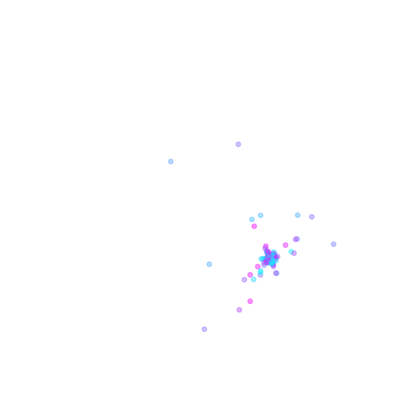

In [126]:
mf.visualize_dyn(celegans_raw_recon_1000)